# Diffraction and Interference

In [24]:
import numpy as np
from numpy import sin, cos, tan, pi, sqrt, arcsin

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Interference
- **Example 9.1**: Calculate the interference between two waves for phases differing by pi/2 at a point x = 0.

In [7]:
# parameters

f = 1               # frequency
w = 2*pi*f          # angular frequency
E0 = 1              # amplitude
phi1 = 0            # phase
phi2 = pi/2
maxTime = 2         # time range
maxCount = 1000     # intervals

In [28]:
# generate waves and irradiance

count = np.array(range(0, maxCount))
t = count/maxCount * maxTime
E1 = E0 * cos(w*t + phi1)
E2 = E0 * cos(w*t + phi2)
E_sum = E1 + E2
I = (E1 + E2)**2


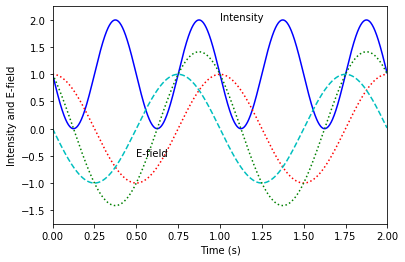

In [36]:
# plot
plt.figure();
plt.plot(t, I, 'b');
plt.plot(t, E1, 'r:');
plt.plot(t, E2, 'c--');
plt.plot(t, E_sum, 'g:')

# axis
plt.axis([0, maxTime, -1.75, 2.25]);

# labels
plt.xlabel('Time (s)');
plt.ylabel('Intensity and E-field');
plt.text(1, 2, 'Intensity');
plt.text(0.5, -0.5, 'E-field');

## Coherence
- **Fact**: In astronomy, light coming from a single source far away is spatially coherent.
- **Example 9.2**: Combine cosinusoids of monotonically increasing frequency to showboth constructive and destructive interference.

In [38]:
# set wave parameters

f0 = 10          # frequency
A = 1            # amplitude

maxWaves = 5     # number of waves
maxWindow = 1    
maxCount = 1000

t = np.linspace(-f0/50, f0/50, maxCount)   # time
df = 0                                     # to add to the frequency

In [39]:
# generate waves

I = np.zeros([maxWaves, maxCount])
for waves in range(1, maxWaves):
    df = df + 1                       # vary the frequency value
    w = 2 * pi * (f0 + df)            # angular frequency
    I[waves, :] = (A*cos(w*t))**2     # create wave with varying frequency value
    
I_sum = np.sum(I, axis=0)             # sum all waves

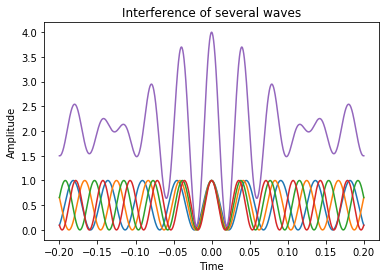

In [40]:
# plot

plt.figure()

for count in range(1, maxWaves):       # plot all waves in variable I
    plt.plot(t, I[count, :]);


plt.plot(t, I_sum);
plt.title('Interference of several waves');
plt.xlabel('Time');
plt.ylabel('Amplitude');

## Diffraction
- **Example 9.3**: Generate a single-slit diffraction pattern normalized to a unit maximum.

In [91]:
# parameters

# -- intensity pattern
a = 0.001                           # slit width
I0 = 1                              # intensity
lambda_ = 600e-9
theta_d = np.arange(-1, 1, .0001)   # angular sweep
theta = theta_d *(pi/180)

# -- on axis wavefront
beta1 = pi*a*sin(theta)/lambda_
diff1 = ((sin(beta1/2)) / (beta1/2))**2
I1 = I0*diff1

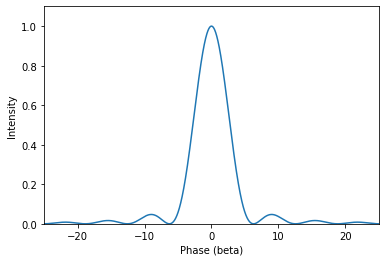

In [92]:
# output

plt.figure();
plt.plot(beta1, I1);
plt.axis([-25, 25, 0, 1.1]);
plt.ylabel('Intensity');
plt.xlabel('Phase (beta)');

## Michaelson Stellar Inferferometer
- **Example 9.4**: Evaluate two wavefronts separated by an angle in a double-slit experiment.

In [95]:
# parameters

# -- intesnity pattern
a = 0.001
d = 0.002
I0 = 1
lambda_ = 600e-9
theta_d = np.arange(-1, 1, 0.0001)
theta = theta_d * pi/180
offset = -0.00015 * 3

# -- on axis wavefront
beta1 = pi*a*sin(theta)/lambda_
delta1 = pi*d*sin(theta)/lambda_
diff1 = (sin(beta1/2) / (beta1/2))**2
inter1 = (cos(delta1))**2
I1 = I0 * diff1 * inter1

# -- second wavefront
beta2 = pi*a*sin(theta+offset)/lambda_
delta2 = pi*d*sin(theta+offset)/lambda_
diff2 = (sin(beta2/2) / (beta2/2))**2
inter2 = (cos(delta2))**2
I2 = I0*diff2*inter2

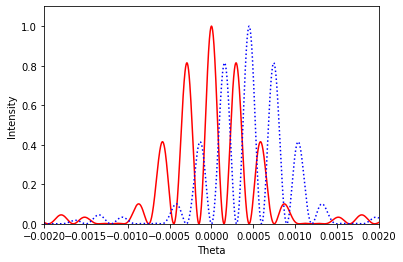

In [106]:
# output

plt.figure();
plt.plot(theta, I1, 'r');
plt.plot(theta, I2, 'b:');
plt.axis([-.002, .002, 0, 1.1]);
plt.ylabel('Intensity');
plt.xlabel('Theta');